In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tf = pd.read_csv('../../data/events.csv', low_memory=False)

In [4]:
tf.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [10]:
tf['staticpage'].value_counts()

CustomerService                      1528
AboutUs                               443
FaqEcommerce                          347
Quiosks                               326
trust-trocafone                       243
galaxy-s8                             167
TermsAndConditionsReturnEcommerce     156
how-to-sell                            96
Conditions                             89
how-to-buy                             86
TermsAndConditionsEcommerce            59
club-trocafone                         46
PrivacyEcommerce                        9
black_friday                            3
Name: staticpage, dtype: int64

In [12]:
tf['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [6]:
tf.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [6]:
tf['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

In [4]:
tf['search_engine'].value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

In [15]:
# to datetime:

tf['timestamp'] = pd.to_datetime(tf['timestamp'])

In [40]:
comprados = tf.loc[tf['event'] == 'conversion']

# Agrego col con nombre del dia
comprados['weekday name'] = tf['timestamp'].dt.weekday_name

/home/seba/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Cantidad de compras por dia de la semana

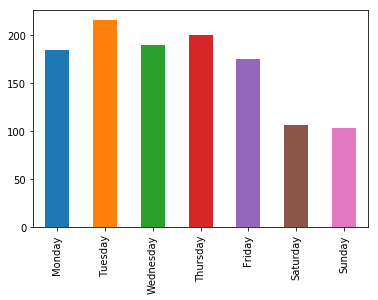

In [41]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

comprados['weekday name'].value_counts().reindex(days).plot(kind='bar')

## Cantidad total de eventos por horario

In [9]:
df_hr = tf.filter(items = ['country','timestamp', 'event'])

df_hr['hour'] = df_hr['timestamp'].dt.hour

gr = df_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(8, 5), grid=True, style="-o")
gr.set_xlabel('Hora (24hs)')
plt.xticks(range(0, 25));

AttributeError: Can only use .dt accessor with datetimelike values

# Analisis de Eventos:

## Cantidad de cada tipo de evento:

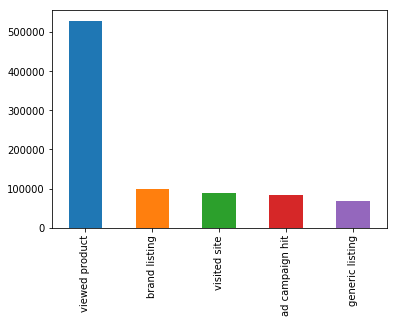

In [8]:
# 5 predominantes:
eventos = tf['event'].value_counts()
eventos.head().plot(kind='bar')

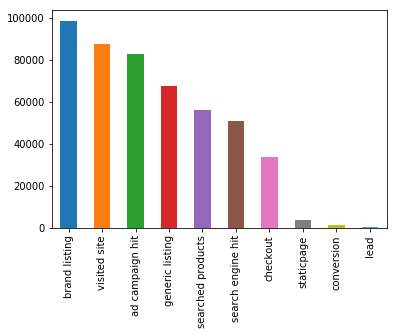

In [9]:
# Sacando evento 'viewed products':

tf['event'].loc[tf['event'] != 'viewed product'].value_counts().plot(kind='bar')

## Cantidad de eventos totales por pais

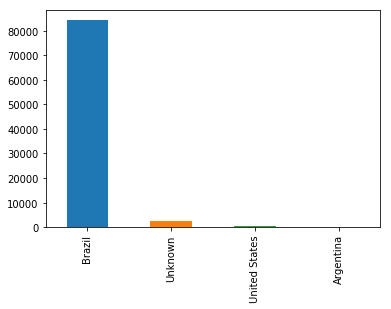

In [10]:
# los 4 predominantes:
# el grafico es feo

df_short = tf.filter(items = ['event', 'country'])
df_short['country'].value_counts().head(4).plot(kind='bar')

## Cantidad de eventos 'viewed product' por mes

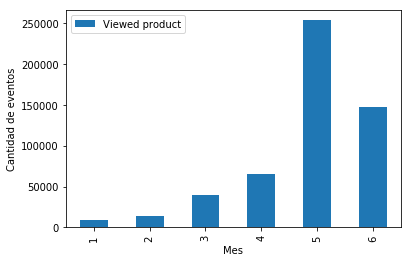

In [34]:
df_event_vp = tf.loc[tf['event'] == 'viewed product' ]
g = df_event_vp.groupby([tf['timestamp'].dt.month, 'event']).size().unstack()\
                        .plot(kind='bar')
g.set_xlabel("Mes")
g.set_ylabel('Cantidad de eventos')
g.legend(['Viewed product'])

## cant ckeckouts >>> cant conversions:

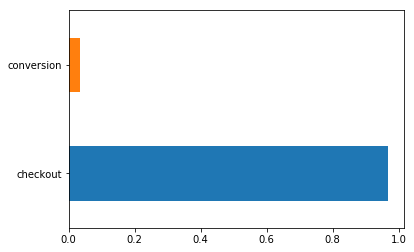

In [25]:
#mal grafico?
df_event = tf.filter(items = ['event', 'timestamp'])
checkout_vs_conv = df_event.loc[(tf['event'] == 'checkout') | (tf['event'] == 'conversion')]
checkout_vs_conv['event'].value_counts(normalize=True).plot(kind='barh')

## Modelos mas comprados:

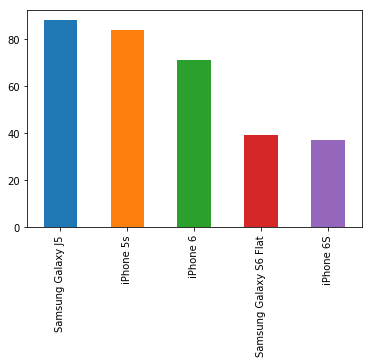

In [16]:
df_event_mod = tf.filter(items = ['event', 'model'])
df_event_mod.loc[df_event_mod['event'] == 'conversion']['model'].value_counts().head().plot(kind='bar')

## Cantidad de comprados por condicion del producto

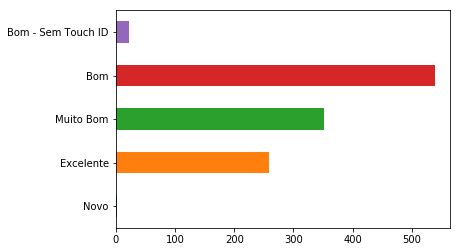

In [18]:
comprados = tf.loc[tf['event'] == 'conversion']

qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
comprados['condition'].value_counts().reindex(qual).plot(kind='barh')

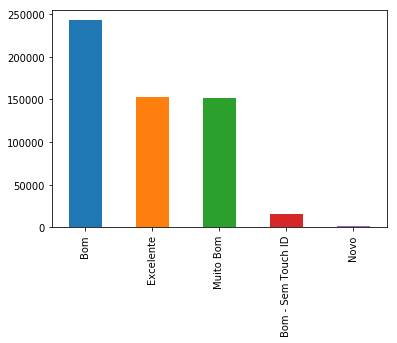

In [19]:
# Cantidad de productos (por 'condition') que tenemos en el dataset:

tf['condition'].value_counts().plot(kind='bar')

## Modelos no disponibles con más pedidos de notificación de stock 

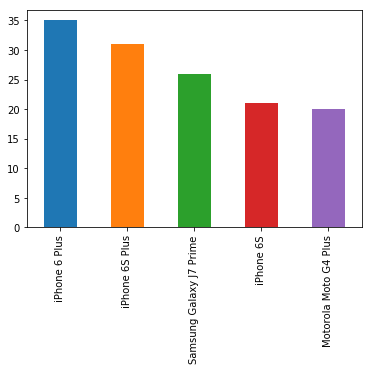

In [20]:
df_event_mod = tf.filter(items = ['event', 'model'])
df_event_mod.loc[df_event_mod['event'] == 'lead']['model'].value_counts().head().plot(kind='bar')

# 'new vs returning' por mes

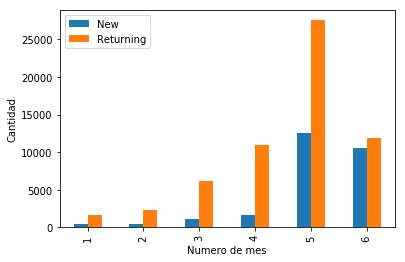

In [29]:
df_new_vs_ret = tf.filter(items = ['event', 'new_vs_returning'])
graf = tf.groupby([tf['timestamp'].dt.month, 'new_vs_returning']).size().unstack().plot(kind='bar')
graf.set(xlabel='Numero de mes', ylabel='Cantidad')
graf.legend(['New', 'Returning'])

# Cantidad de visitas por compra de cliente

## Solo los clientes que por lo menos realizaron una compra

In [5]:
person_event = tf.filter(items=['person', 'event'])
person_event['cant'] = 1
person_event = person_event.loc[(person_event['event'] == 'conversion') | (person_event['event'] == 'viewed product')]

person_conv = person_event.groupby(['person', 'event']).agg({'cant': 'sum'}).unstack()
person_conv = person_conv.loc[(person_conv['cant']['conversion'].notnull()) & (person_conv['cant']['conversion'] != 0)]

In [6]:
# Cambio nombre columnas
person_conv.columns = ['conversion', 'viewed product']

In [7]:
person_conv.head()

,conversion,viewed product
person,,
00204059,1.0,44.0
00c13dee,1.0,17.0
00fdbb4b,1.0,3.0
0146a9df,1.0,23.0
01db2fe6,1.0,67.0


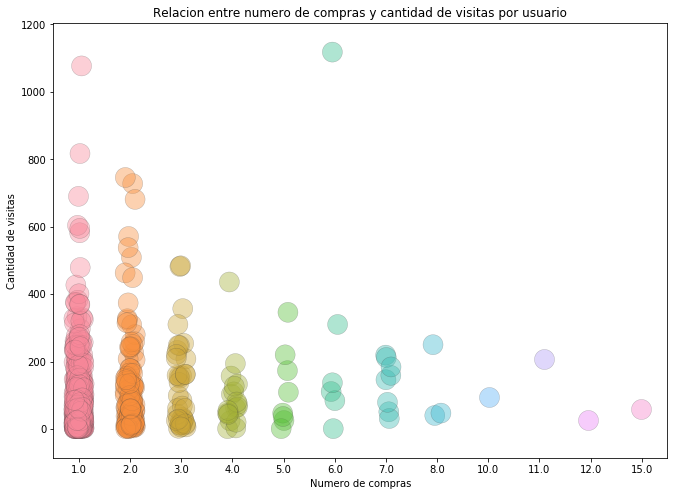

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

dx = sns.stripplot(x="conversion", y="viewed product", data=person_conv,\
                   jitter=True, linewidth=0.4, alpha=.4, marker=".", size=40, ax=ax)

dx.set(xlabel='Numero de compras', ylabel='Cantidad de visitas', \
       title='Relacion entre numero de compras y cantidad de visitas por usuario');


Cada punto es un cliente (identificado a partir de la columna 'person') que posee una cantidad total de visitas al sitio (cantidad de eventos 'viewed product') y un numero total de compras (cantidad de eventos 'conversion'). En el gráfico solo se muestran los usuarios que realizaron más de una compra.

[Text(0,0.5,'Cantidad'),
 Text(0.5,0,'Numero de compras'),
 Text(0.5,1,'Cantidad total de compras')]

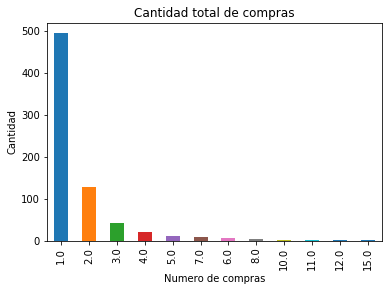

In [31]:
g = person_conv['conversion'].value_counts().plot(kind='bar')

g.set(xlabel="Numero de compras", ylabel='Cantidad', title='Cantidad total de compras')


In [111]:
# los de 1 compra

person_conv1 = person_event.groupby(['person', 'event']).agg({'cant': 'sum'}).unstack()
person_conv1 = person_conv1.loc[(person_conv1['cant']['conversion'].notnull()) & (person_conv1['cant']['conversion'] == 1)]

In [114]:
person_conv1.columns = ['conversion', 'viewed product']
person_conv1.head()

,conversion,viewed product
person,,
00204059,1.0,44.0
00c13dee,1.0,17.0
00fdbb4b,1.0,3.0
0146a9df,1.0,23.0
01db2fe6,1.0,67.0


In [123]:
person_conv1['viewed product'].value_counts().head(10)

3.0     16
1.0     13
5.0     12
4.0     12
17.0     9
2.0      8
15.0     8
9.0      8
8.0      7
21.0     7
Name: viewed product, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd808489470>]],
      dtype=object)

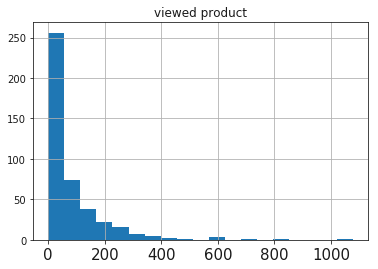

In [136]:
#g = person_conv1['viewed product'].value_counts().plot().hist()
person_conv1.hist(column='viewed product', xlabelsize=15, bins=19)

- - -

# ¿Cuantos usuarios regresan 'x' cantidad de veces al sitio?

In [155]:
# No hay registros de personas NaN
tf['person'].isna().sum()

0

In [157]:
# Cantidad de usuarios distintos registrados
tf['person'].value_counts().count()

27624

- - -

In [3]:
new_vs_returning = tf.filter(items=['person', 'new_vs_returning'])


# Podemos considerar que todos los valores nulos son registros de usuarios que regresan al sitio ('Returning').
# Luego descartaremos los usuarios que no tienen ningun registro de haber ingresado al sitio por primera vez ('New').

new_vs_returning.fillna({'new_vs_returning': 'Returning'}, inplace=True)

new_vs_returning = new_vs_returning.groupby(['person'])['new_vs_returning'].value_counts(dropna=False)

In [159]:
# Obtengo una serie
new_vs_returning.head()

person    new_vs_returning
0004b0a2  Returning            3
          New                  1
0006a21a  Returning            3
          New                  1
000a54b2  Returning           36
Name: new_vs_returning, dtype: int64

In [160]:
# Construyo un DataFrame
new_vs_returning_df = new_vs_returning.unstack()
new_vs_returning_df.head()

new_vs_returning,New,Returning
person,,
0004b0a2,1.0,3.0
0006a21a,1.0,3.0
000a54b2,1.0,36.0
00184bf9,1.0,50.0
0019c395,1.0,7.0


In [161]:
# Veo cuantos nulos hay en la columna 'New'. Es decir, cuantos usuarios no fueron detectados por primera vez
new_vs_returning_df['New'].value_counts(dropna=False)

 1.0    26898
NaN       726
Name: New, dtype: int64

In [162]:
# Veo cuantos nulos hay en la columna returning
new_vs_returning_df['Returning'].isna().sum()

0

In [163]:
# Elimino los usuarios que no fueron detectados por primera vez:
new_vs_returning_df.dropna(inplace=True)

[Text(0,0.5,'Cantidad de usuarios'),
 Text(0.5,0,'Numero de veces que regresa un usuario a la pagina'),
 Text(0.5,1,'Cuantos usuarios regresan "x" cantidad de veces al sitio')]

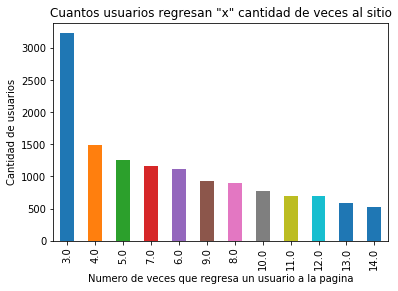

In [165]:
new_vs_returning_g = new_vs_returning_df['Returning'].value_counts().head(12).plot(kind='bar')

new_vs_returning_g.set(xlabel='Numero de veces que regresa un usuario a la pagina', ylabel='Cantidad de usuarios',\
                      title='Cuantos usuarios regresan "x" cantidad de veces al sitio')